## Import libraries

In [2]:
import pandas
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [3]:
heart = pandas.read_csv("pc.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartpred
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Check the null values in dataset

In [4]:
heart.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           4
thal         2
heartpred    0
dtype: int64

## Preprocess Data and handle missing values  using simple mean imputation methods

In [5]:
heart["thal"] = heart["thal"].fillna(heart["thal"].median())
heart["ca"] = heart["ca"].fillna(heart["ca"].median())
print(heart.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.663366   
std      0.994971   22.8750

## Let's find the ranges of each feature by disease type 

### Age

In [7]:
print("Minimum age to Maximum age per disease type")
heart.groupby(["heartpred", ])["age"].min().astype(str) + ', ' +  heart.groupby(["heartpred", ])["age"].max().astype(str)

Minimum age to Maximum age per disease type


heartpred
0    29.0, 76.0
1    35.0, 70.0
2    42.0, 69.0
3    39.0, 70.0
4    38.0, 77.0
Name: age, dtype: object

In [8]:
print("Mean age per disease type")
heart.groupby(["heartpred", ])["age"].mean()

Mean age per disease type


heartpred
0    52.585366
1    55.381818
2    58.027778
3    56.000000
4    59.692308
Name: age, dtype: float64

#### We can see that heart disease with type 3 can be present in lower age then type 2

## Sex

In [9]:
print("Count each sex per heart disease type")
heart.groupby(["heartpred", "sex"])["age"].count()

Count each sex per heart disease type


heartpred  sex
0          0.0    72
           1.0    92
1          0.0     9
           1.0    46
2          0.0     7
           1.0    29
3          0.0     7
           1.0    28
4          0.0     2
           1.0    11
Name: age, dtype: int64

#### We can see that heart disease all types can be present in men with higher probability than in women

## chest_pain

In [13]:
print('Count each chest pain value per heart disease type')
heart.groupby(["heartpred", "cp"])["age"].count()

Count each chest pain value per heart disease type


heartpred  cp 
0          1.0    16
           2.0    41
           3.0    68
           4.0    39
1          1.0     5
           2.0     6
           3.0     9
           4.0    35
2          1.0     1
           2.0     1
           3.0     4
           4.0    30
3          2.0     2
           3.0     4
           4.0    29
4          1.0     1
           3.0     1
           4.0    11
Name: age, dtype: int64

#### The people with chest pain = 0 often have heart disease.  

## blood pressure

In [16]:
print("Minimum blood pressure to Maximum  blood pressure per disease type")
heart.groupby(["heartpred"])["trestbps"].min().astype(str) + ', ' +  heart.groupby(["heartpred"])["trestbps"].max().astype(str)

Minimum blood pressure to Maximum  blood pressure per disease type


heartpred
0     94.0, 180.0
1    108.0, 192.0
2    100.0, 180.0
3    100.0, 200.0
4    112.0, 165.0
Name: trestbps, dtype: object

In [18]:
print("Mean resting blood pressure per disease type")
heart.groupby(["heartpred", ])["trestbps"].mean()

Mean blood pressure per disease type


heartpred
0    129.250000
1    133.254545
2    134.194444
3    135.457143
4    138.769231
Name: trestbps, dtype: float64

#### As bigger is mean blood pressure as higher is type of heart disease

In [19]:
print("Minimum serum_cholestoral to Maximum serum_cholestoral per disease type")
heart.groupby(["heartpred"])["chol"].min().astype(str) + ', ' +  heart.groupby(["heartpred"])["chol"].max().astype(str)

Minimum serum_cholestoral to Maximum serum_cholestoral per disease type


heartpred
0    126.0, 564.0
1    149.0, 335.0
2    169.0, 409.0
3    131.0, 353.0
4    166.0, 407.0
Name: chol, dtype: object

### serum_cholestoral

In [20]:
print("Mean serum_cholestoral per disease type")
heart.groupby(["heartpred", ])["chol"].mean()

Mean serum_cholestoral per disease type


heartpred
0    242.640244
1    249.109091
2    259.277778
3    246.457143
4    253.384615
Name: chol, dtype: float64

## fasting_blood_sugar

In [21]:
print("Count each fasting_blood_sugar per heart disease type")
heart.groupby(["heartpred", "fbs"])["age"].count()

Count each fasting_blood_sugar per heart disease type


heartpred  fbs
0          0.0    141
           1.0     23
1          0.0     51
           1.0      4
2          0.0     27
           1.0      9
3          0.0     27
           1.0      8
4          0.0     12
           1.0      1
Name: age, dtype: int64

## electrocardiographic results

In [23]:
print("Count each electrocardiographic per heart disease type")
heart.groupby(["heartpred", "restecg"])["age"].count()

Count each electrocardiographic per heart disease type


heartpred  restecg
0          0.0        95
           1.0         1
           2.0        68
1          0.0        23
           2.0        32
2          0.0        19
           1.0         1
           2.0        16
3          0.0        12
           1.0         1
           2.0        22
4          0.0         2
           1.0         1
           2.0        10
Name: age, dtype: int64

## max_heart_rate

In [25]:
print("Minimum max_heart_rate to Maximum max_heart_rate per disease type")
heart.groupby(["heartpred"])["thalach"].min().astype(str) + ', ' +  heart.groupby(["heartpred"])["thalach"].max().astype(str)

Minimum max_heart_rate to Maximum max_heart_rate per disease type


heartpred
0     96.0, 202.0
1     88.0, 195.0
2     71.0, 170.0
3     90.0, 173.0
4    114.0, 182.0
Name: thalach, dtype: object

In [26]:
print("Mean max_heart_rate per disease type")
heart.groupby(["heartpred", ])["thalach"].mean()

Mean max_heart_rate per disease type


heartpred
0    158.378049
1    145.927273
2    135.583333
3    132.057143
4    140.615385
Name: thalach, dtype: float64

## induced_angina

In [28]:
print("Count  induced_angina per heart disease type")
heart.groupby(["heartpred", "exang"])["age"].count()

Count  induced_angina per heart disease type


heartpred  exang
0          0.0      141
           1.0       23
1          0.0       30
           1.0       25
2          0.0       14
           1.0       22
3          0.0       12
           1.0       23
4          0.0        7
           1.0        6
Name: age, dtype: int64

## ST_depression

In [29]:
print("Count  mean ST_depression per heart disease type")
heart.groupby(["heartpred"])["oldpeak"].mean()

Count  mean ST_depression per heart disease type


heartpred
0    0.586585
1    1.005455
2    1.780556
3    1.962857
4    2.361538
Name: oldpeak, dtype: float64

## slope

In [33]:
print("Count slope per heart disease type")
heart.groupby(["heartpred", "slope"])["age"].count()

Count slope per heart disease type


heartpred  slope
0          1.0      106
           2.0       49
           3.0        9
1          1.0       22
           2.0       31
           3.0        2
2          1.0        7
           2.0       26
           3.0        3
3          1.0        6
           2.0       24
           3.0        5
4          1.0        1
           2.0       10
           3.0        2
Name: age, dtype: int64

## vessels

In [35]:
print("Count  mean vessels per heart disease type")
heart.groupby(["heartpred"])["ca"].mean()

Count  mean vessels per heart disease type


heartpred
0    0.268293
1    0.727273
2    1.222222
3    1.457143
4    1.692308
Name: ca, dtype: float64

## Thal

In [36]:
print("Count  mean thal per heart disease type")
heart.groupby(["heartpred"])["thal"].mean()

Count  mean thal per heart disease type


heartpred
0    3.792683
1    5.345455
2    5.944444
3    6.285714
4    6.230769
Name: thal, dtype: float64

### We can consider that the person with 

#### age > 38
#### man
#### with chest pain = 4
#### blood pressure > 112
#### serum_cholestoral > 166
#### fasting_blood_sugar = 0
#### electrocardiographic = 2
#### max_heart_rate > 114
#### ST_depression about 2
#### slope >=2
#### vessels about 1.6
#### thal more than 6

### is the most likely have 4 type of the heart disease

In [6]:
heart.loc[heart["heartpred"]==2,"heartpred"]=1
heart.loc[heart["heartpred"]==3,"heartpred"]=1
heart.loc[heart["heartpred"]==4,"heartpred"]=1

In [7]:
X=heart.iloc[:,:-1]
y=heart.iloc[:,-1]

## Cross-validation for parameter tuning, model selection, and feature selection 

In [79]:
log=cross_val_score(LogisticRegression(),X,y,cv=10,scoring='accuracy')
knn=cross_val_score(KNeighborsClassifier(),X,y,cv=10,scoring='accuracy')
dt=cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')
rf=cross_val_score(RandomForestClassifier(),X,y,cv=10,scoring='accuracy')
svm=cross_val_score(SVC(),X,y,cv=10,scoring='accuracy')

In [80]:
print(log.mean())
print(knn.mean())
print(dt.mean())
print(rf.mean())
print(svm.mean())

0.8277048572487951
0.6574898034853541
0.7543418613274009
0.807582499073044
0.5508713385242863


## Using K-Fold Cross Validation 

In [81]:
from sklearn.model_selection import KFold

In [82]:
kf=KFold(n_splits=15)

In [83]:
for i,k in kf.split(X=X):
    print('Train','\t\t\t\t\t\t\t\t\t\t','Test')
    print(i,'\t\t\t\t\t\t',k)

Train 										 Test
[ 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 

In [84]:
log=cross_val_score(LogisticRegression(),X,y,cv=kf,scoring='accuracy')
knn=cross_val_score(KNeighborsClassifier(),X,y,cv=kf,scoring='accuracy')
dt=cross_val_score(DecisionTreeClassifier(),X,y,cv=kf,scoring='accuracy')
rf=cross_val_score(RandomForestClassifier(),X,y,cv=kf,scoring='accuracy')

In [85]:
print(log.mean())
print(knn.mean())
print(dt.mean())
print(rf.mean())

0.8312698412698415
0.6561904761904761
0.6958730158730158
0.8211111111111111


## More efficient parameter tuning using `GridSearchCV`

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
p={'penalty':['l1','l2'],'C':[.001,.01,.1,1,10,100],'random_state':[0,101,102,103,104]}
log_grid =GridSearchCV(LogisticRegression(),param_grid=p,cv=40,scoring='accuracy')

In [88]:
log_grid.fit(X,y)

GridSearchCV(cv=40, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'random_state': [0, 101, 102, 103, 104]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [89]:
log_grid.best_score_

0.8382838283828383

In [90]:
log_grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'random_state': 0}

In [91]:
log_grid.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
p={'n_estimators':[60,70,75,80,90],'min_samples_split':[10,20,30,40,50],'criterion':['gini','entropy']}
rf_grid =GridSearchCV(RandomForestClassifier(),param_grid=p,cv=5,scoring='accuracy')

In [93]:
rf_grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [60, 70, 75, 80, 90], 'min_samples_split': [10, 20, 30, 40, 50], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [94]:
rf_grid.best_score_

0.8481848184818482

In [95]:
rf_grid.best_params_

{'criterion': 'entropy', 'min_samples_split': 30, 'n_estimators': 60}

In [96]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2)
X_train=lda.fit_transform(X_train,y_train)
X_test=lda.transform(X_test)

In [100]:
lda.explained_variance_ratio_

array([1.])

In [101]:
rf=RandomForestClassifier(criterion='entropy',min_samples_split=20,n_estimators=80)

In [102]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [103]:
y_pred=rf.predict(X_test)

In [104]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.83      0.83      0.83        41
          1       0.80      0.80      0.80        35

avg / total       0.82      0.82      0.82        76



In [105]:
confusion_matrix(y_test,y_pred)

array([[34,  7],
       [ 7, 28]], dtype=int64)

In [106]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred[0:25])

True: [0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1]
Pred: [0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1]


## Using Logistic Regression

In [107]:
lg=LogisticRegression(C=10,penalty='l2',random_state=0)

In [108]:
lg.fit(X_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
y_pred=lg.predict(X_test)

In [110]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[33  8]
 [ 5 30]]
             precision    recall  f1-score   support

          0       0.87      0.80      0.84        41
          1       0.79      0.86      0.82        35

avg / total       0.83      0.83      0.83        76



In [111]:
accuracy_score(y_test,y_pred)

0.8289473684210527

In [112]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred[0:25])

True: [0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1]
Pred: [0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1]


## Using Naive Bayes

In [113]:
from sklearn.naive_bayes import GaussianNB

In [114]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None)

In [115]:
pred=model.predict(X_test)

In [116]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[33  8]
 [ 5 30]]
             precision    recall  f1-score   support

          0       0.87      0.80      0.84        41
          1       0.79      0.86      0.82        35

avg / total       0.83      0.83      0.83        76



## Exploratory Visualization

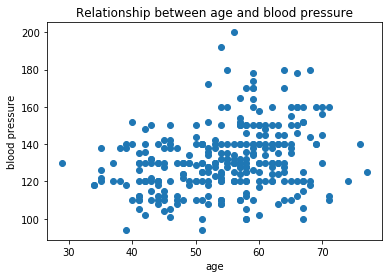

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("age")
plt.ylabel("blood pressure")

# define title
plt.title("Relationship between age and blood pressure")

# plot
plt.scatter(heart['age'], heart['trestbps'])
plt.show()

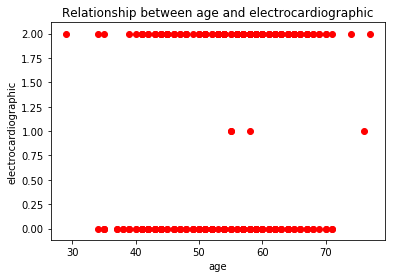

In [119]:
plt.xlabel("age")
plt.ylabel("electrocardiographic")

# define title
plt.title("Relationship between age and electrocardiographic")

# plot
plt.scatter(heart['age'], heart['restecg'], color = 'red')
plt.show()

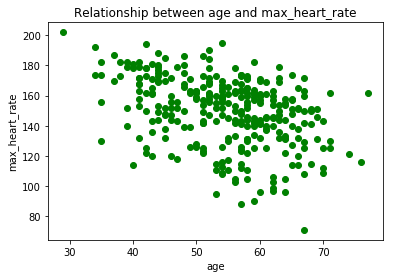

In [120]:
plt.xlabel("age")
plt.ylabel("max_heart_rate")

# define title
plt.title("Relationship between age and max_heart_rate")

# plot
plt.scatter(heart['age'], heart['thalach'], color = 'green')
plt.show()